## Housing Market in Sydney Australia

We start by load useful packages.

In [2]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(broom)

In [3]:
data <- read.csv('data.csv') %>% select(-X)
data$num_bed <- as.factor(data$num_bed)
head(data)

,price,num_bed,property_size,suburb_median_income,km_from_cbd
,<dbl>,<fct>,<int>,<dbl>,<dbl>
1,2800,4,866,41.964,39.78
2,1315,4,557,31.148,65.14
3,2640,5,234,67.236,7.11
4,1825,4,260,55.692,6.53
5,1200,5,1499,29.952,72.13
6,1195,4,213,42.432,9.02


Introduction

to be written here


### Method 1: Split data into 2 data:

data1: 0 <= property size <= 2000

data2: 2000 < property size

In [4]:
data1 <- data %>% filter(property_size <= 2000)
data2 <- data %>% filter(property_size > 2000)

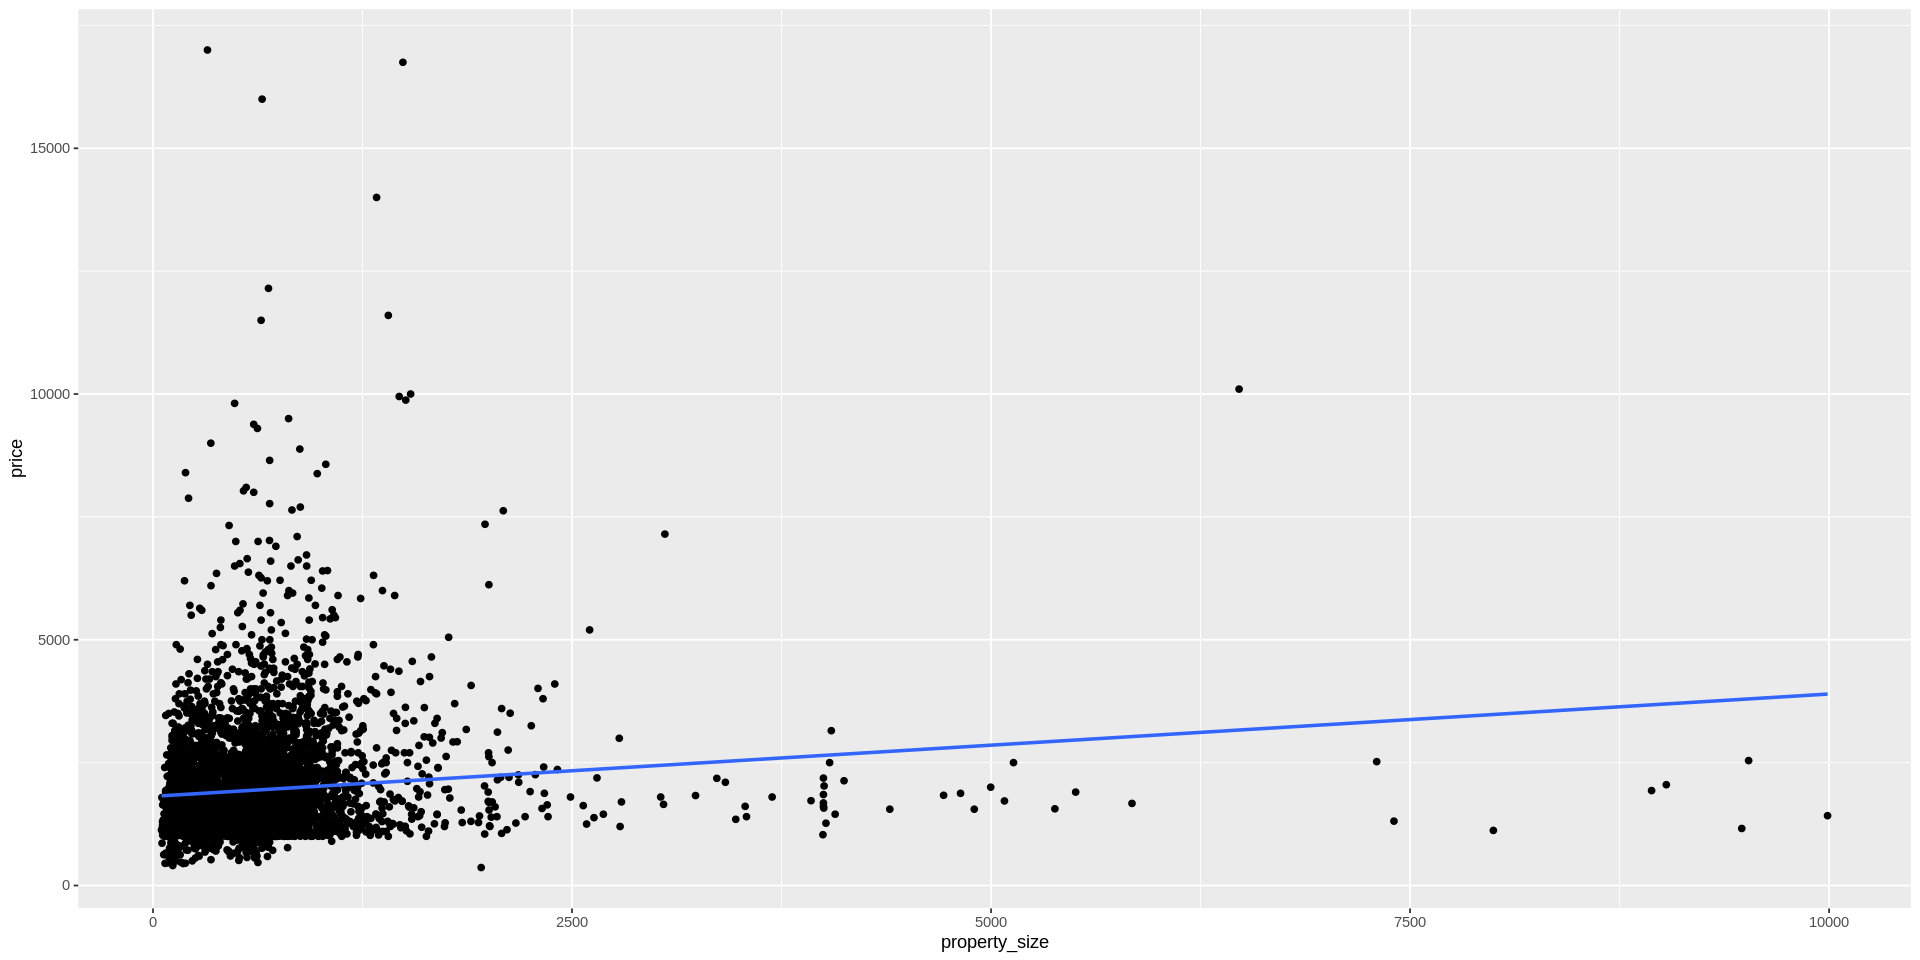

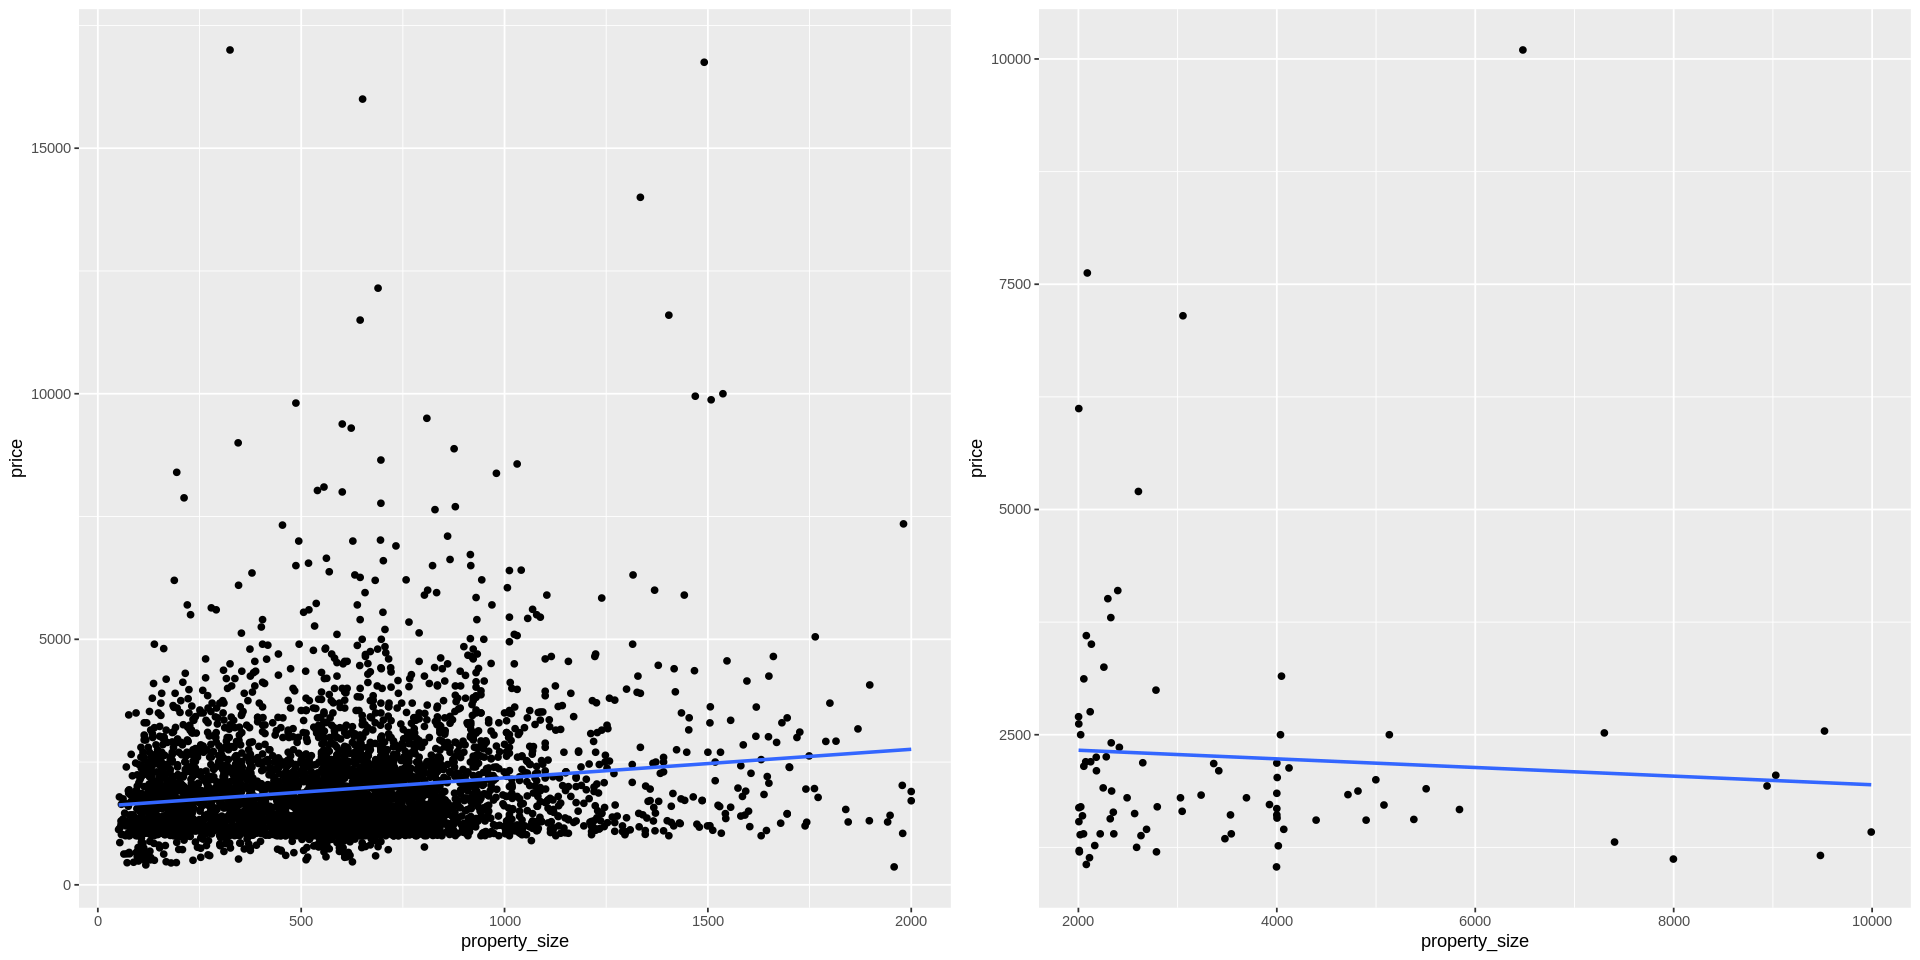

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8)
        
data_price_vs_size <- ggplot(data) +
    geom_point(aes(x = property_size, y = price)) +
    geom_smooth(aes(x = property_size, y = price), formula = y ~ x, method = 'lm', se = FALSE)

data1_price_vs_size <- ggplot(data1) +
    geom_point(aes(x = property_size, y = price)) +
    geom_smooth(aes(x = property_size, y = price), formula = y ~ x, method = 'lm', se = FALSE)

data2_price_vs_size <- ggplot(data2) +
    geom_point(aes(x = property_size, y = price)) +
    geom_smooth(aes(x = property_size, y = price), formula = y ~ x, method = 'lm', se = FALSE)

data_price_vs_size
plot_grid(data1_price_vs_size, data2_price_vs_size, ncol = 2)

#### Anova test of the full additive model of data1:

In [6]:
lm_data1 <- lm(formula = price ~., data = data1)
tidy(aov(lm_data1))

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
num_bed,4,168769233,42192308.3,51.91171,7.262843e-43
property_size,1,66534626,66534626.4,81.86151,2.079234e-19
suburb_median_income,1,1379346258,1379346257.9,1697.09180,6.951123e-318
km_from_cbd,1,726419371,726419371.3,893.75699,3.136569e-180
Residuals,4796,3898047611,812770.6,NA,NA


From the above table, for all input variables, the p-values are less than 0.05

#### Anova test of the full additive model of data2:

In [7]:
lm_data2 <- lm(formula = price ~., data = data2)
tidy(aov(lm_data2)) %>% mutate_if(is.numeric, round, 8)

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
num_bed,4,4192724.3,1048181.1,0.8098558,0.52243761
property_size,1,799798.2,799798.2,0.6179479,0.43407666
suburb_median_income,1,33925236.8,33925236.8,26.2116453,0.00000199
km_from_cbd,1,39800223.9,39800223.9,30.7508347,0.00000035
Residuals,82,106131049.3,1294281.1,NA,NA


From the above table, for `num_bed` and `property_size`, the p value is larger than 0.05. For `suburb_median_income` and `km_from_cbd`, the p-values are less than 0.05.

#### Forward selection of data1:

In [8]:
lm_data1_fs1 <- lm(price ~ 1, data = data1)
tidy(lm_data1_fs1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1943.557,16.44386,118.1935,0


In [9]:
add1(lm_data1_fs1,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data1)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,6239117100,67627.43,NA,NA
num_bed,4,168769233,6070347867,67503.69,33.35573,1.745613e-27
property_size,1,152383356,6086733744,67510.64,120.21963,1.201777e-27
suburb_median_income,1,1047521234,5191595866,66746.47,968.91151,6.237290e-194
km_from_cbd,1,816246395,5422870705,66955.84,722.79341,1.977134e-148


In [10]:
lm_data1_fs2 <- lm(price ~ suburb_median_income, data = data1)
tidy(lm_data1_fs2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),233.4730,56.949694,4.099635,4.206378e-05
suburb_median_income,41.9814,1.348698,31.127343,6.237290e-194


In [11]:
add1(lm_data1_fs2,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data1)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5191595866,66746.47,NA,NA
num_bed,4,327909362,4863686503,66441.03,80.8702,1.610445e-66
property_size,1,436061898,4755533967,66327.00,440.2309,1.365466e-93
km_from_cbd,1,297636452,4893959414,66464.84,291.9829,1.350609e-63


In [12]:
lm_data1_fs3 <- lm(price ~ suburb_median_income + property_size, data = data1)
tidy(lm_data1_fs3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-650.044750,68.88134967,-9.437166,5.812349e-21
suburb_median_income,48.803866,1.33127079,36.659609,1.239846e-259
property_size,1.014941,0.04837273,20.981681,1.365466e-93


In [13]:
add1(lm_data1_fs3,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data1)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,4755533967,66327.00,NA,NA
num_bed,4,131066985,4624466982,66200.74,33.98923,5.184521e-28
km_from_cbd,1,609815893,4145718074,65669.73,706.05773,2.936493e-145


In [14]:
lm_data1_fs4 <- lm(price ~ suburb_median_income + property_size + km_from_cbd, data = data1)
tidy(lm_data1_fs4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),192.169476,71.70572000,2.679974,7.387924e-03
suburb_median_income,37.020203,1.31984884,28.048820,1.930915e-160
property_size,1.394339,0.04737257,29.433478,3.335572e-175
km_from_cbd,-23.756284,0.89404300,-26.571747,2.936493e-145


In [15]:
add1(lm_data1_fs4,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data1)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,4145718074,65669.73,NA,NA
num_bed,4,247670463,3898047611,65381.81,76.18093,1.014725e-62


In [16]:
lm_data1_fs5 <- lm(price ~ suburb_median_income + property_size + km_from_cbd + num_bed,
                   data = data1)
tidy(lm_data1_fs5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-489.442332,177.10299105,-2.763603,5.738524e-03
suburb_median_income,37.017740,1.28629127,28.778660,3.779135e-168
property_size,1.141947,0.04834383,23.621367,8.615967e-117
km_from_cbd,-26.515882,0.88694430,-29.895769,3.136569e-180
num_bed2,364.128602,167.70124796,2.171293,2.995788e-02
num_bed3,741.031495,164.32276368,4.509609,6.649646e-06
num_bed4,1007.278391,164.46640851,6.124524,9.821733e-10
num_bed5,1204.288420,166.05188490,7.252483,4.747471e-13


All input variables are considered as significant and are added to the model. So the input variables would be used in this model are `suburb_median_income`, `property_size`, `km_from_cbd`, and `num_bed`. The model should be `lm_data1_fs5`.

In [17]:
summary(lm_data1_fs5)


Call:
lm(formula = price ~ suburb_median_income + property_size + km_from_cbd + 
    num_bed, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2484.3  -492.6  -150.7   261.7 13834.2 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -489.44233  177.10299  -2.764  0.00574 ** 
suburb_median_income   37.01774    1.28629  28.779  < 2e-16 ***
property_size           1.14195    0.04834  23.621  < 2e-16 ***
km_from_cbd           -26.51588    0.88694 -29.896  < 2e-16 ***
num_bed2              364.12860  167.70125   2.171  0.02996 *  
num_bed3              741.03149  164.32276   4.510 6.65e-06 ***
num_bed4             1007.27839  164.46641   6.125 9.82e-10 ***
num_bed5             1204.28842  166.05188   7.252 4.75e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 901.5 on 4796 degrees of freedom
Multiple R-squared:  0.3752,	Adjusted R-squared:  0.3743 
F-statistic: 411.5 on 

Check the adjusted $R^2$ of the models. We can see that `lm_data1_fs5` has the largest value of adjusted $R^2$.

In [18]:
summary(lm_data1_fs1)$adj.r.squared
summary(lm_data1_fs2)$adj.r.squared
summary(lm_data1_fs3)$adj.r.squared
summary(lm_data1_fs4)$adj.r.squared
summary(lm_data1_fs5)$adj.r.squared

[1] 0

[1] 0.1677225

[1] 0.2374698

[1] 0.3351128

[1] 0.3743126

#### Forward selection of data2:

In [19]:
lm_data2_fs1 <- lm(price ~ 1, data = data2)
tidy(lm_data2_fs1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2252.982,151.9121,14.83083,8.820941e-26


In [20]:
add1(lm_data2_fs1,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data2)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,184849033,1310.172,NA,NA
num_bed,4,4192724.3,180656308,1316.107,0.4931762,7.407385e-01
property_size,1,781736.8,184067296,1311.790,0.3737374,5.425501e-01
suburb_median_income,1,28712768.0,156136265,1296.979,16.1828105,1.213023e-04
km_from_cbd,1,60049838.3,124799194,1276.817,42.3431081,4.533796e-09


In [21]:
lm_data2_fs2 <- lm(price ~ km_from_cbd, data = data2)
tidy(lm_data2_fs2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4318.72551,341.374450,12.650992,1.654585e-21
km_from_cbd,-48.56219,7.462888,-6.507158,4.533796e-09


In [22]:
add1(lm_data2_fs2,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data2)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,124799194,1276.817,NA,NA
num_bed,4,11250594,113548600,1276.314,2.080717,0.09051871
property_size,1,2525449,122273745,1276.977,1.796903,0.18357733
suburb_median_income,1,7275234,117523960,1273.411,5.385671,0.02264214


In [23]:
lm_data2_fs3 <- lm(price ~ km_from_cbd + suburb_median_income, data = data2)
tidy(lm_data2_fs3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2248.16562,952.389631,2.360552,2.048312e-02
km_from_cbd,-41.87636,7.832666,-5.346373,7.138827e-07
suburb_median_income,45.68722,19.686787,2.320705,2.264214e-02


In [24]:
add1(lm_data2_fs3,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data2)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,117523960,1273.411,NA,NA
num_bed,4,10157006,107366954,1273.276,1.9629678,0.1077406
property_size,1,1161395,116362565,1274.517,0.8583511,0.3567932


In [25]:
lm_data2_fs4 <- lm(price ~ km_from_cbd + suburb_median_income + num_bed, data = data2)
tidy(lm_data2_fs4) %>% mutate_if(is.numeric, round, 8)
tidy(aov(lm_data2_fs4)) %>% mutate_if(is.numeric, round, 8)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),299.8540776,1571.060805,0.1908609,0.84910066
km_from_cbd,-45.3353287,8.200573,-5.5283122,0.00000037
suburb_median_income,46.6356340,21.333500,2.1860283,0.03162998
num_bed2,0.5497218,1617.322057,0.0003399,0.99972962
num_bed3,2138.7996422,1206.260948,1.7730821,0.07988365
num_bed4,1933.8336872,1172.438394,1.6494118,0.10284322
num_bed5,2246.8071427,1168.969867,1.9220403,0.05803186


term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
km_from_cbd,1,60049838,60049838,46.421514,0.00000000
suburb_median_income,1,7275234,7275234,5.624118,0.02003019
num_bed,4,10157006,2539251,1.962968,0.10774058
Residuals,83,107366954,1293578,NA,NA


We saw here the p-value for `num_bed` is 0.10774058, larger than 0.05. Slso for each dummy variable `num_bed2`, `num_bed3`, `num_bed4`, and `num_bed5`, the p-value is larger than 0.05, indicating that 95% confidence intervals of the coefficients for the dummy variables would include 0. 

We may stop here and use the model `lm_data2_fs3`.

But, as we can see, though the p-values for `num_bed` in `lm_data2_fs4` are larger than 0.05, it is not extremely large. So we can further compare their adjusted $R^2$ to see which model is better.

Check the adjusted $R^2$ of the models.

In [26]:
lm_data2_fs5 <- lm(price ~ ., data = data2)
summary(lm_data2_fs1)$adj.r.squared
summary(lm_data2_fs2)$adj.r.squared
summary(lm_data2_fs3)$adj.r.squared
summary(lm_data2_fs4)$adj.r.squared
summary(lm_data2_fs5)$adj.r.squared

[1] 0

[1] 0.3171868

[1] 0.3496008

[1] 0.377176

[1] 0.3768373

`lm_data2_fs4` has the largest adjusted $R^2$.

### Method 2: log `property_size`

Fit the model to see the difference in the value of adjusted $R^2$ for additive model with all input variables and the additive model with log(property_size) and all other input variables.

In [27]:
lm <- lm(price ~ km_from_cbd + suburb_median_income + property_size + num_bed,
         data = data)

lm_log <- lm(price ~ km_from_cbd + suburb_median_income + log(property_size) + num_bed,
         data = data)

summary(lm)
summary(lm_log)


Call:
lm(formula = price ~ km_from_cbd + suburb_median_income + property_size + 
    num_bed, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3674.7  -506.8  -161.5   271.4 13779.3 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -171.13408  180.82250  -0.946   0.3440    
km_from_cbd           -24.67667    0.90556 -27.250  < 2e-16 ***
suburb_median_income   34.30477    1.32514  25.888  < 2e-16 ***
property_size           0.39092    0.02534  15.424  < 2e-16 ***
num_bed2              363.80612  171.90920   2.116   0.0344 *  
num_bed3              908.50498  168.06558   5.406 6.76e-08 ***
num_bed4             1215.48259  168.03212   7.234 5.43e-13 ***
num_bed5             1460.11840  169.43703   8.617  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 938 on 4886 degrees of freedom
Multiple R-squared:  0.3317,	Adjusted R-squared:  0.3308 
F-statistic: 346.5 on 7 a


Call:
lm(formula = price ~ km_from_cbd + suburb_median_income + log(property_size) + 
    num_bed, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2606.7  -497.5  -161.8   253.3 13696.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3360.9226   216.9461 -15.492  < 2e-16 ***
km_from_cbd            -28.0011     0.8858 -31.612  < 2e-16 ***
suburb_median_income    39.6848     1.2943  30.660  < 2e-16 ***
log(property_size)     624.1211    24.4684  25.507  < 2e-16 ***
num_bed2               131.6007   165.5516   0.795  0.42670    
num_bed3               327.0432   163.5290   2.000  0.04557 *  
num_bed4               559.2234   164.1027   3.408  0.00066 ***
num_bed5               759.3421   165.9925   4.575 4.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 902.3 on 4886 degrees of freedom
Multiple R-squared:  0.3816,	Adjusted R-squared:  0.3807 
F-statistic: 430.6

In [28]:
summary(lm)$adj.r.squared
summary(lm_log)$adj.r.squared

[1] 0.3307872

[1] 0.3806721

We saw the model with log(property_size) has larger value for adjusted $R^2$.

#### Anova test of the full additive model with `property_size` instead of `log(property_size)`:

In [29]:
tidy(aov(lm))

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
km_from_cbd,1,821660691,821660691,933.9611,7.376025e-188
suburb_median_income,1,542211698,542211698,616.3184,3.106153e-128
property_size,1,343670782,343670782,390.6420,1.035747e-83
num_bed,4,426378908,106594727,121.1636,1.005020e-98
Residuals,4886,4298502513,879759,NA,NA


#### Anova test of the full additive model with `log(property_size)` instead of `property_size`:

In [30]:
tidy(aov(lm_log))

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
km_from_cbd,1,821660691,821660690.7,1009.18873,1.689161e-201
suburb_median_income,1,542211698,542211698.0,665.96095,8.872334e-138
log(property_size),1,946245425,946245425.0,1162.20750,1.034105e-228
num_bed,4,144226138,36056534.4,44.28574,1.417971e-36
Residuals,4886,3978080641,814179.4,NA,NA


#### Forward selection of the full additive model with `property_size` instead of `log(property_size)`:

In [31]:
lm_fs1 <- lm(price ~ 1, data = data)
tidy(lm_fs1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1949.247,16.38958,118.9321,0


In [32]:
add1(lm_fs1,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,6432424592,68952.84,NA,NA
num_bed,4,175932776,6256491816,68825.12,34.36971,2.457450e-28
property_size,1,68047341,6364377251,68902.79,52.30482,5.488611e-13
suburb_median_income,1,1064823622,5367600970,68069.17,970.47399,1.603898e-194
km_from_cbd,1,821660691,5610763901,68286.01,716.40229,2.121702e-147


In [33]:
lm_fs2 <- lm(price ~ suburb_median_income, data = data)
tidy(lm_fs2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),232.52653,57.105092,4.071905,4.736680e-05
suburb_median_income,42.17553,1.353844,31.152432,1.603898e-194


In [34]:
add1(lm_fs2,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5367600970,68069.17,NA,NA
num_bed,4,336875721,5030725250,67759.96,81.82958,2.459988e-67
property_size,1,169434417,5198166553,67914.20,159.42231,5.483184e-36
km_from_cbd,1,299048767,5068552203,67790.62,288.57304,6.292853e-63


In [35]:
lm_fs3 <- lm(price ~ suburb_median_income + num_bed, data = data)
tidy(lm_fs3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-917.12105,191.550544,-4.787880,1.735283e-06
suburb_median_income,45.92563,1.330764,34.510733,9.193098e-234
num_bed2,361.18497,185.919234,1.942698,5.210998e-02
num_bed3,895.29634,181.727237,4.926594,8.643672e-07
num_bed4,1059.16179,181.378953,5.839497,5.574293e-09
num_bed5,1332.10018,182.719656,7.290404,3.586090e-13


In [36]:
add1(lm_fs3,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5030725250,67759.96,NA,NA
property_size,1,78932197,4951793053,67684.56,77.89939,1.485752e-18
km_from_cbd,1,522922670,4507802580,67224.82,566.91105,1.194167e-118


In [37]:
lm_fs4 <- lm(price ~ suburb_median_income + num_bed + km_from_cbd, data = data)
tidy(lm_fs4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-48.44459,184.974245,-0.2618991,7.934103e-01
suburb_median_income,33.94079,1.356666,25.0177959,4.402457e-130
num_bed2,331.68459,176.013774,1.8844241,5.956694e-02
num_bed3,957.27874,172.060551,5.5636154,2.783252e-08
num_bed4,1290.23346,171.985171,7.5020041,7.423403e-14
num_bed5,1583.41838,173.302117,9.1367515,9.232869e-20
km_from_cbd,-21.49848,0.902922,-23.8098939,1.194167e-118


In [38]:
add1(lm_fs4,
     ~ num_bed + property_size + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,4507802580,67224.82,NA,NA
property_size,1,209300067,4298502513,66994.15,237.9061,1.904999e-52


In [39]:
lm_fs5 <- lm(price ~ suburb_median_income + num_bed + km_from_cbd + property_size, data = data)
tidy(lm_fs5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-171.1340757,180.82249557,-0.9464203,3.439811e-01
suburb_median_income,34.3047661,1.32514176,25.8876198,1.389985e-138
num_bed2,363.8061184,171.90919682,2.1162691,3.437236e-02
num_bed3,908.5049759,168.06558079,5.4056576,6.764166e-08
num_bed4,1215.4825905,168.03211607,7.2336326,5.432832e-13
num_bed5,1460.1184009,169.43703323,8.6174691,9.118974e-18
km_from_cbd,-24.6766698,0.90555582,-27.2503023,2.431171e-152
property_size,0.3909201,0.02534459,15.4242062,1.904999e-52


In [40]:
summary(lm_fs1)$adj.r.squared
summary(lm_fs2)$adj.r.squared
summary(lm_fs3)$adj.r.squared
summary(lm_fs4)$adj.r.squared
summary(lm_fs5)$adj.r.squared

[1] 0

[1] 0.1653694

[1] 0.2171115

[1] 0.2983459

[1] 0.3307872

#### Forward selection of the full additive model with `log(property_size)` instead of  `property_size`:

In [41]:
lm_log_fs1 <- lm(price ~ 1, data = data)
tidy(lm_log_fs1)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1949.247,16.38958,118.9321,0


In [42]:
add1(lm_log_fs1,
     ~ num_bed + log(property_size) + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,6432424592,68952.84,NA,NA
num_bed,4,175932776,6256491816,68825.12,34.36971,2.457450e-28
log(property_size),1,109598130,6322826462,68870.74,84.79658,4.796296e-20
suburb_median_income,1,1064823622,5367600970,68069.17,970.47399,1.603898e-194
km_from_cbd,1,821660691,5610763901,68286.01,716.40229,2.121702e-147


In [43]:
lm_log_fs2 <- lm(price ~ suburb_median_income, data = data)
tidy(lm_log_fs2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),232.52653,57.105092,4.071905,4.736680e-05
suburb_median_income,42.17553,1.353844,31.152432,1.603898e-194


In [44]:
add1(lm_log_fs2,
     ~ num_bed + log(property_size) + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,5367600970,68069.17,NA,NA
num_bed,4,336875721,5030725250,67759.96,81.82958,2.459988e-67
log(property_size),1,497323256,4870277714,67595.33,499.43929,2.032488e-105
km_from_cbd,1,299048767,5068552203,67790.62,288.57304,6.292853e-63


In [45]:
lm_log_fs3 <- lm(price ~ suburb_median_income + log(property_size), data = data)
tidy(lm_log_fs3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3325.89943,168.263718,-19.76599,1.003514e-83
suburb_median_income,52.09424,1.363962,38.19331,1.446966e-279
log(property_size),503.62000,22.535210,22.34814,2.032488e-105


In [46]:
add1(lm_log_fs3,
     ~ num_bed + log(property_size) + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,4870277714,67595.33,NA,NA
num_bed,4,78577366,4791700348,67523.72,20.03504,2.215989e-16
km_from_cbd,1,747970936,4122306778,66781.31,887.26484,2.587040e-179


In [47]:
lm_log_fs4 <- lm(price ~ suburb_median_income + log(property_size) + km_from_cbd, data = data)
tidy(lm_log_fs4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3722.04893,155.390570,-23.95286,5.533806e-120
suburb_median_income,40.76178,1.311389,31.08290,9.931211e-194
log(property_size),746.44047,22.279683,33.50319,9.958133e-222
km_from_cbd,-26.43518,0.887474,-29.78699,2.587040e-179


In [48]:
add1(lm_log_fs4,
     ~ num_bed + log(property_size) + suburb_median_income + km_from_cbd,
     test = "F", 
     data = data)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,4122306778,66781.31,NA,NA
num_bed,4,144226138,3978080641,66615.02,44.28574,1.417971e-36


In [49]:
lm_log_fs5 <- lm(price ~ suburb_median_income + log(property_size) + km_from_cbd + num_bed, 
                 data = data)
summary(lm_log_fs5)


Call:
lm(formula = price ~ suburb_median_income + log(property_size) + 
    km_from_cbd + num_bed, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2606.7  -497.5  -161.8   253.3 13696.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3360.9226   216.9461 -15.492  < 2e-16 ***
suburb_median_income    39.6848     1.2943  30.660  < 2e-16 ***
log(property_size)     624.1211    24.4684  25.507  < 2e-16 ***
km_from_cbd            -28.0011     0.8858 -31.612  < 2e-16 ***
num_bed2               131.6007   165.5516   0.795  0.42670    
num_bed3               327.0432   163.5290   2.000  0.04557 *  
num_bed4               559.2234   164.1027   3.408  0.00066 ***
num_bed5               759.3421   165.9925   4.575 4.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 902.3 on 4886 degrees of freedom
Multiple R-squared:  0.3816,	Adjusted R-squared:  0.3807 
F-statistic: 430.6

In [50]:
summary(lm_log_fs1)$adj.r.squared
summary(lm_log_fs2)$adj.r.squared
summary(lm_log_fs3)$adj.r.squared
summary(lm_log_fs4)$adj.r.squared
summary(lm_log_fs5)$adj.r.squared

[1] 0

[1] 0.1653694

[1] 0.2425455

[1] 0.3587432

[1] 0.3806721

## Residual plots:

### For Method 1 (data1): `lm_data1_fs5`

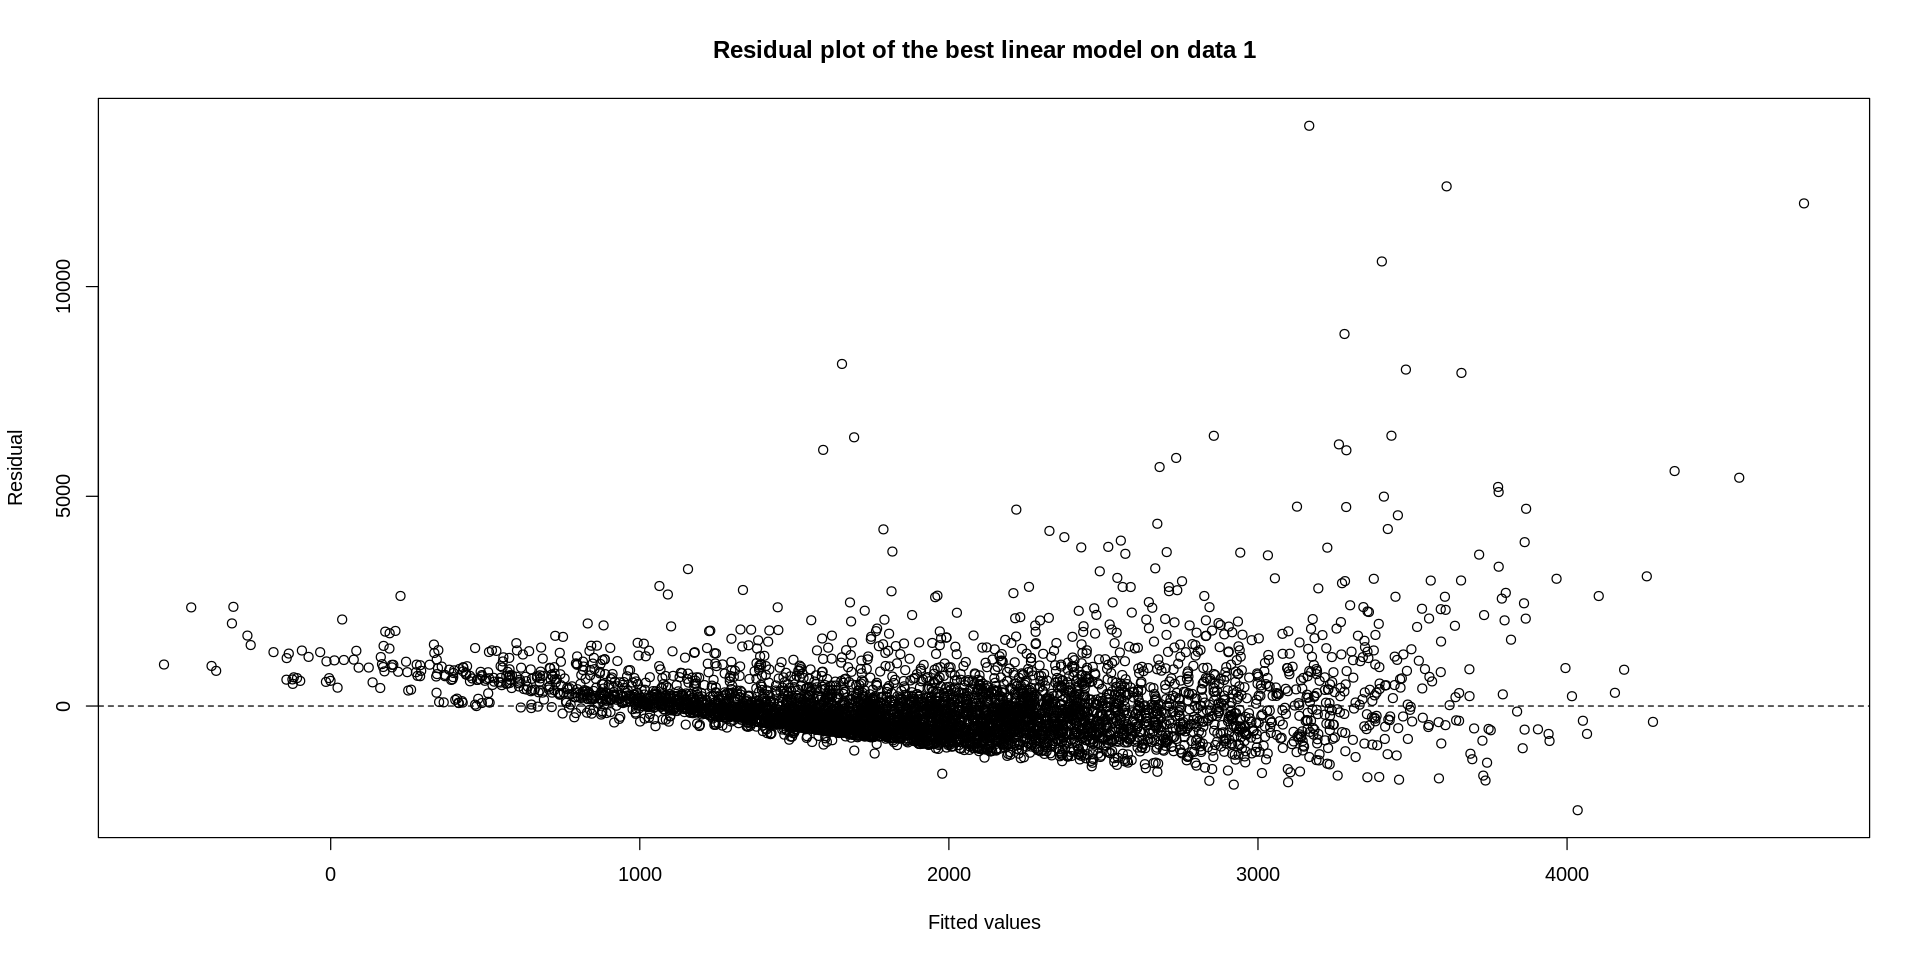

In [51]:
plot(x = fitted(lm_data1_fs5), 
     y = residuals(lm_data1_fs5),
     xlab = "Fitted values",
     ylab = "Residual",
     main = "Residual plot of the best linear model on data 1")
abline(h = 0, lty = 2)

### For Method 1 (data2): `lm_data2_fs3` and `lm_data2_fs4`

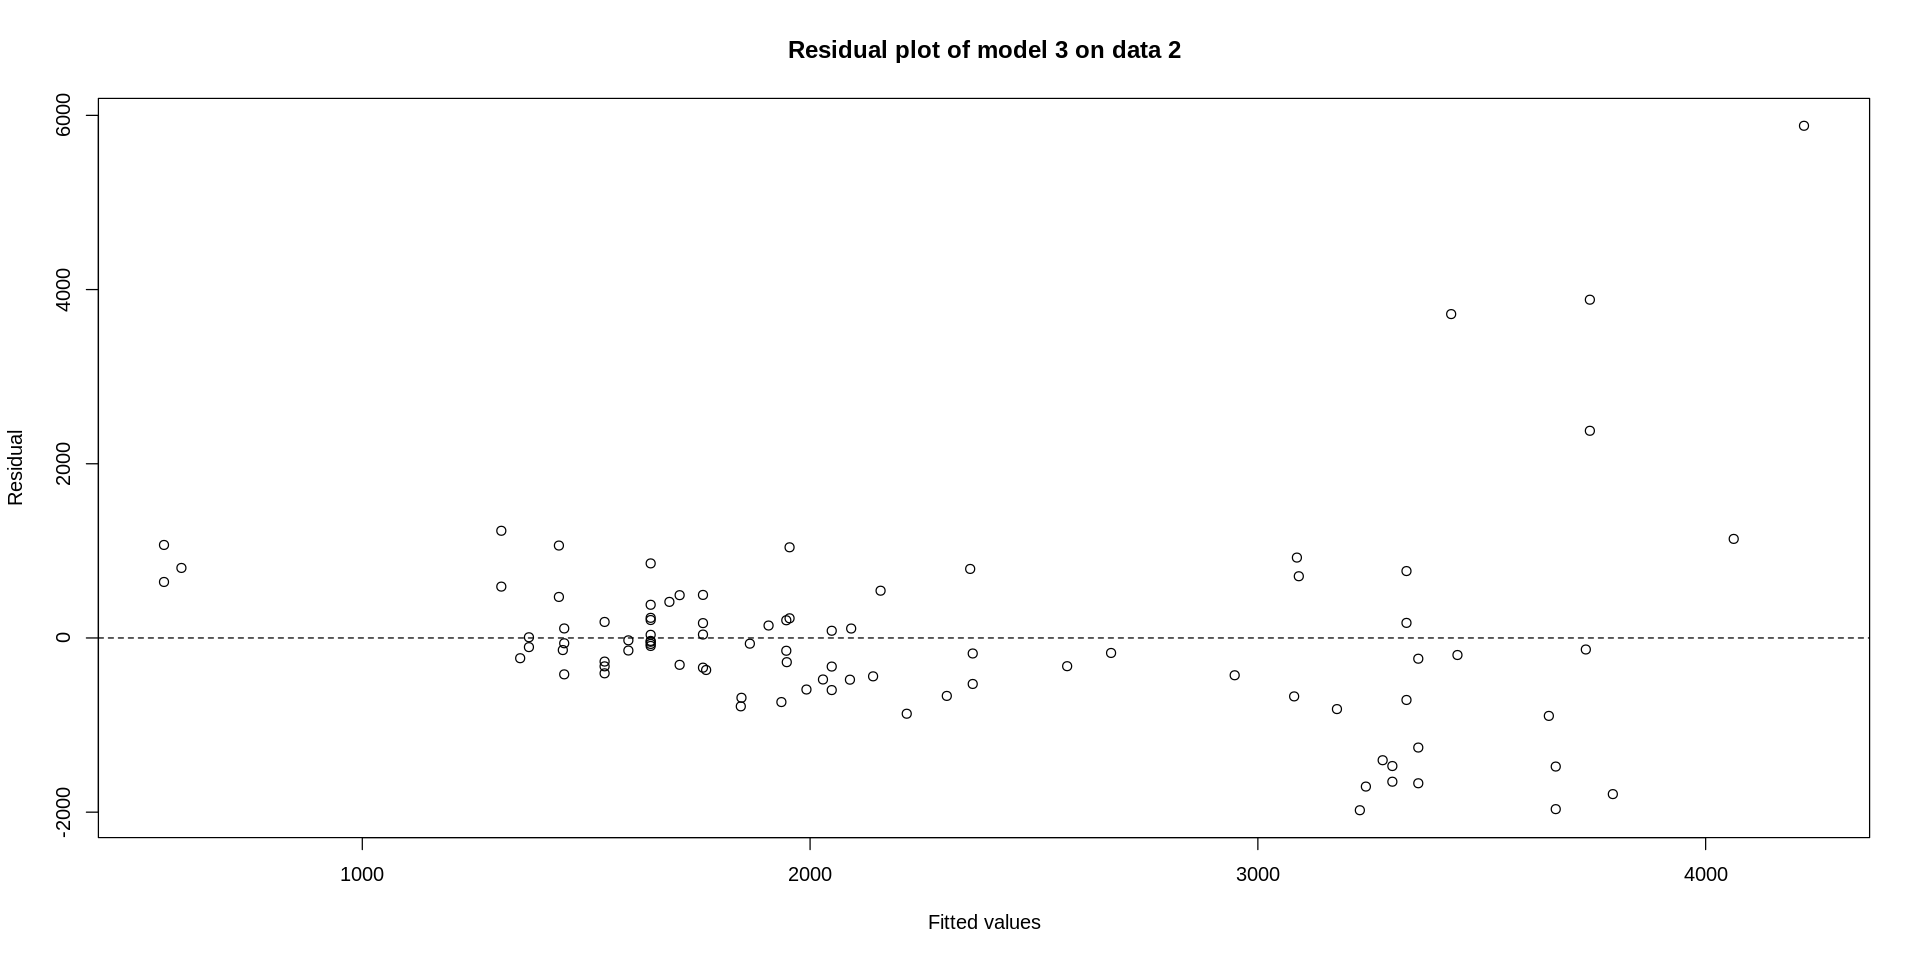

In [52]:
plot(x = fitted(lm_data2_fs3), 
     y = residuals(lm_data2_fs3),
     xlab = "Fitted values",
     ylab = "Residual",
     main = "Residual plot of model 3 on data 2")
abline(h = 0, lty = 2)

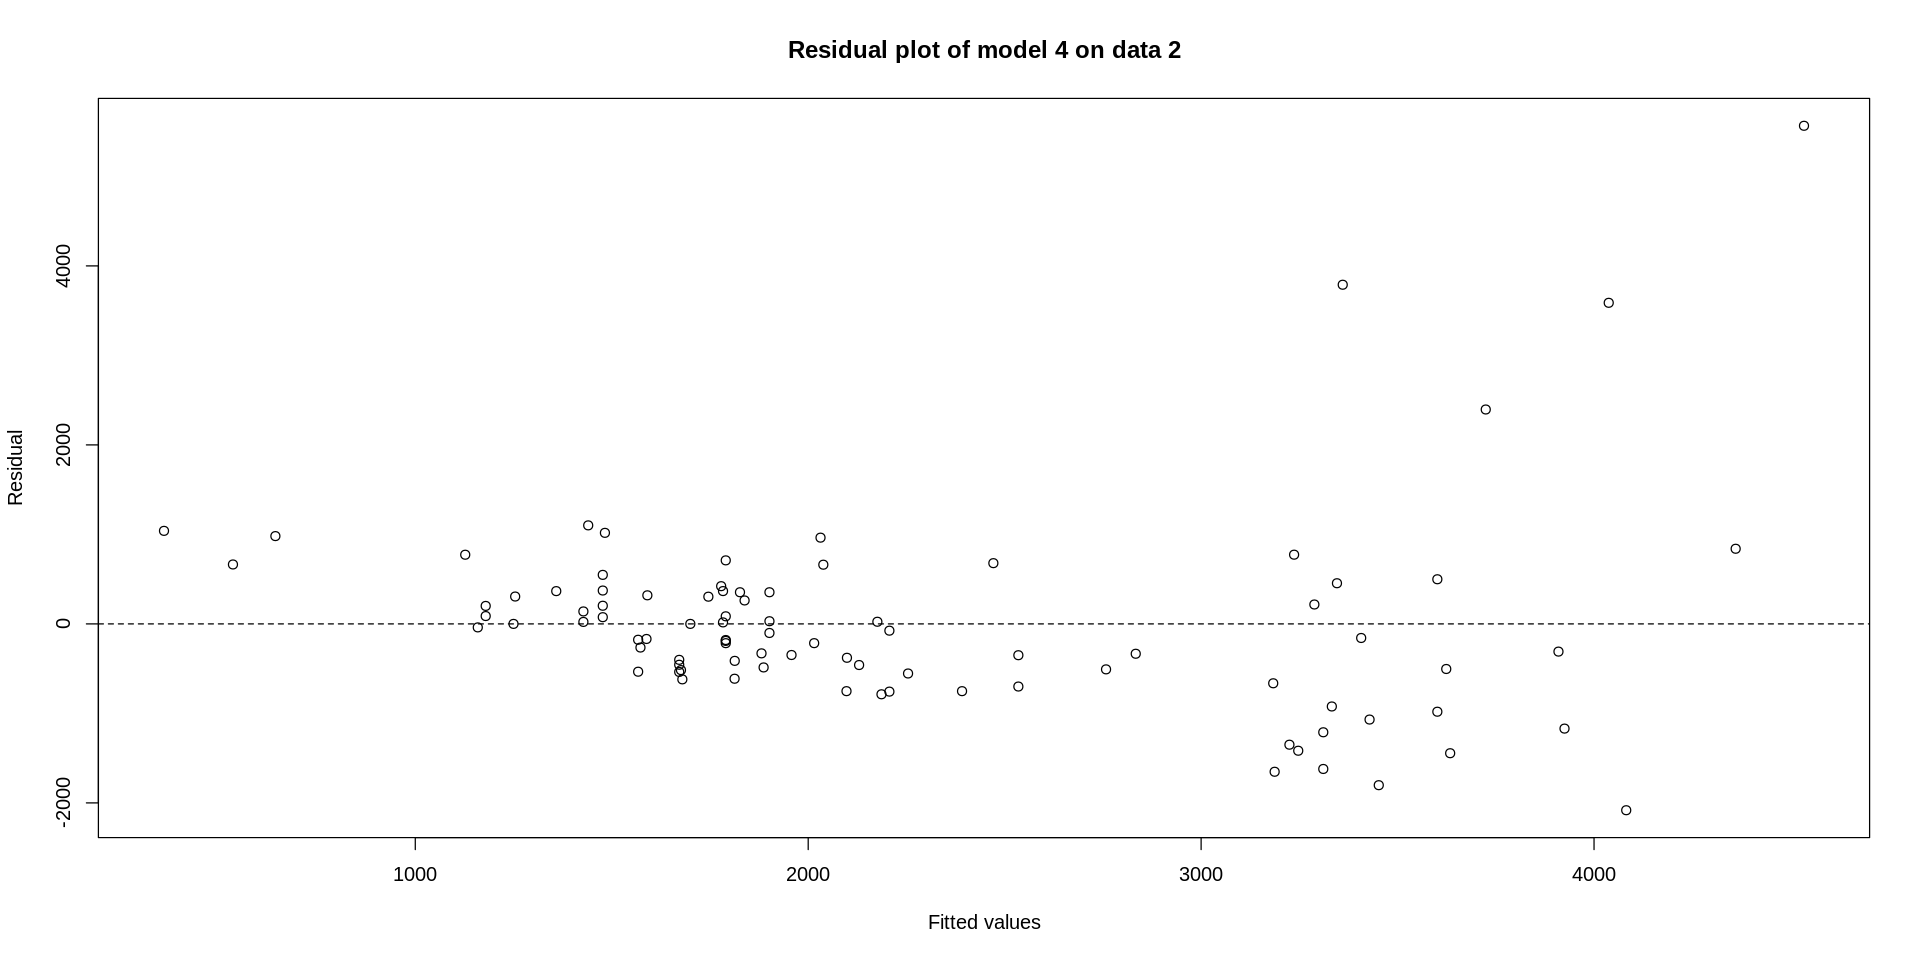

In [53]:
plot(x = fitted(lm_data2_fs4), 
     y = residuals(lm_data2_fs4),
     xlab = "Fitted values",
     ylab = "Residual",
     main = "Residual plot of model 4 on data 2")
abline(h = 0, lty = 2)

### For Method 2: Full additive model with `property_size`

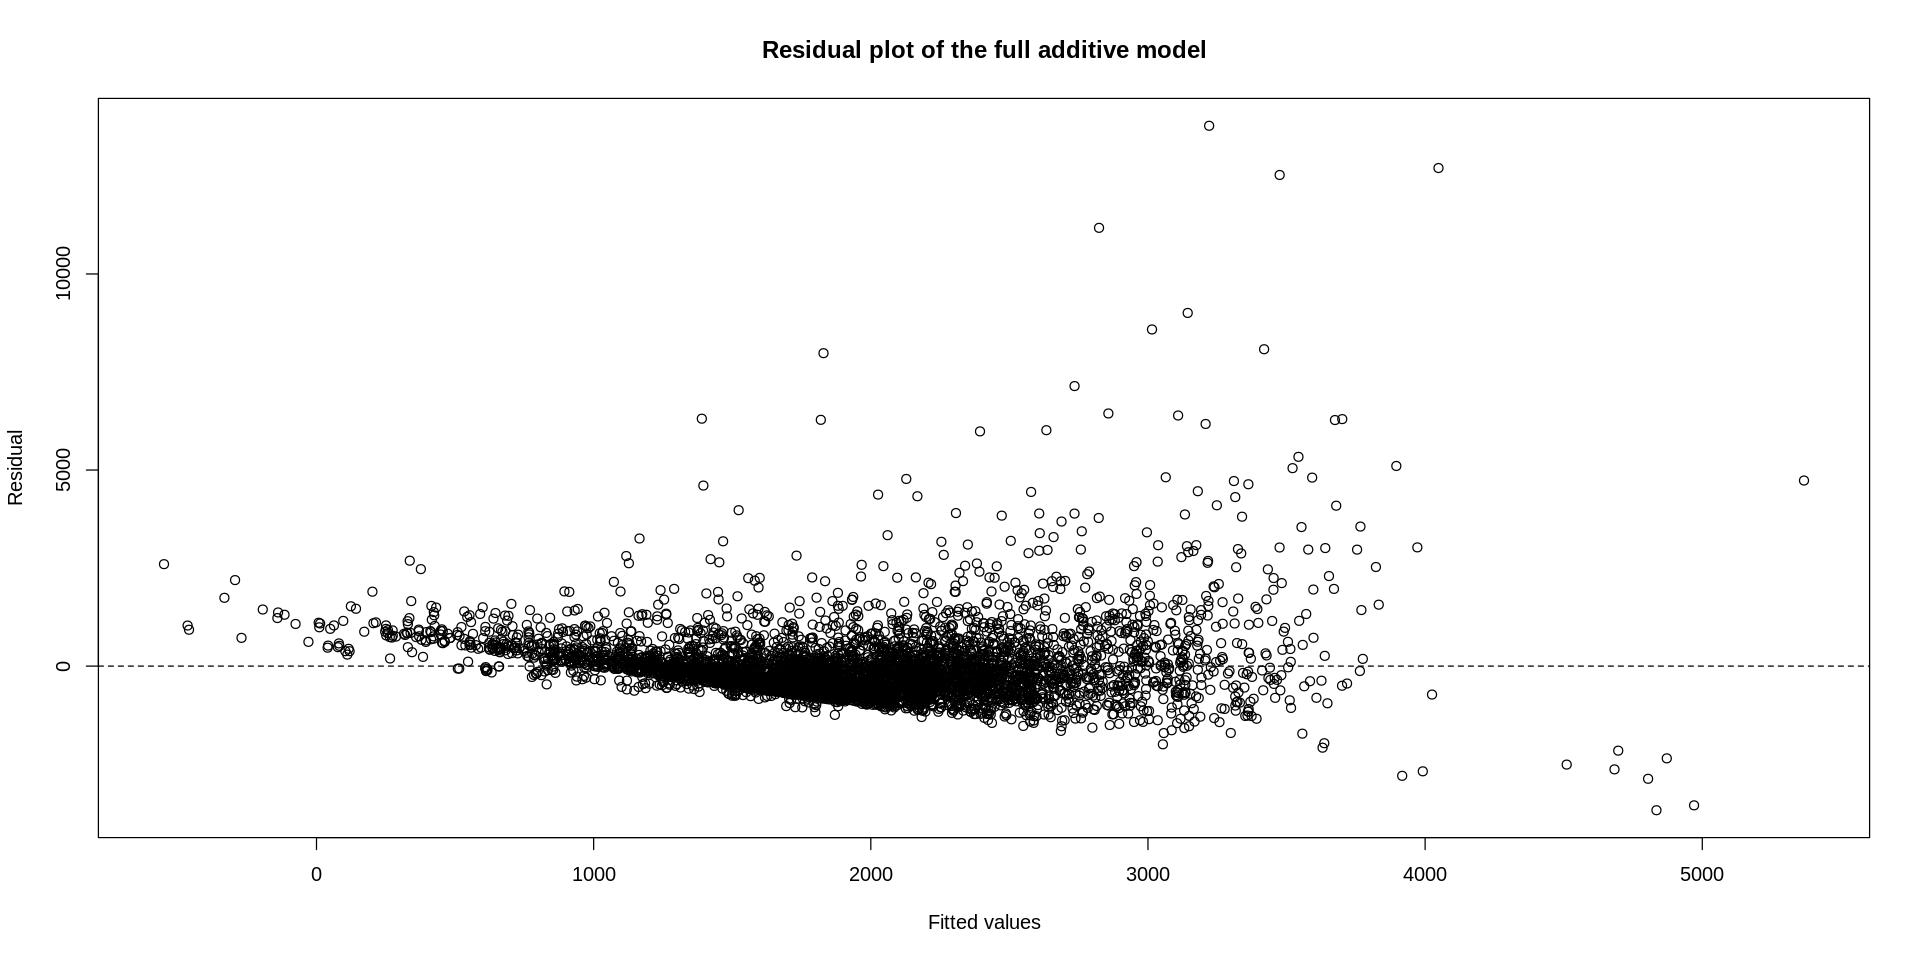

In [54]:
plot(x = fitted(lm_fs5), 
     y = residuals(lm_fs5),
     xlab = "Fitted values",
     ylab = "Residual",
     main = "Residual plot of the full additive model")
abline(h = 0, lty = 2)

### For Method 2: Full additive model with `log(property_size)`

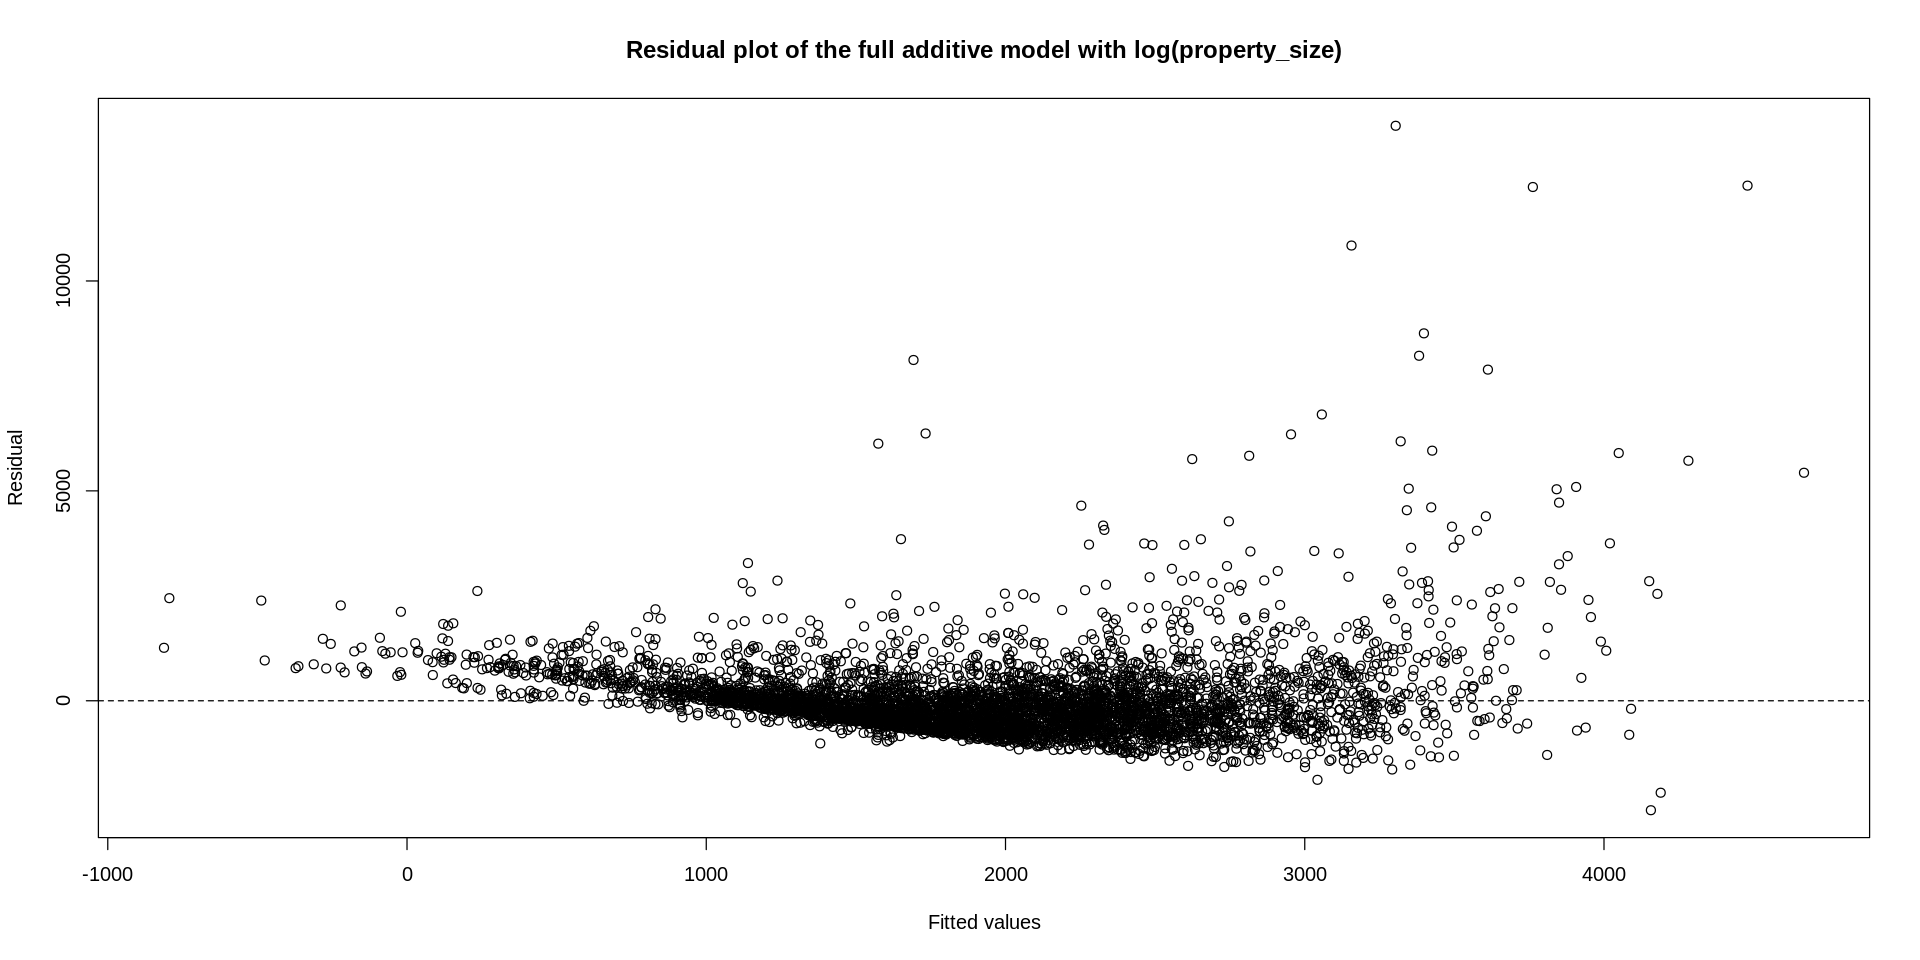

In [55]:
plot(x = fitted(lm_log_fs5), 
     y = residuals(lm_log_fs5),
     xlab = "Fitted values",
     ylab = "Residual",
     main = "Residual plot of the full additive model with log(property_size)")
abline(h = 0, lty = 2)

## Conclusion

In this project, we aimed to build an inference model to analyse what factors affect the price of a house (in AUD) in Sydney, Australia. From the obtained dataframe, we had many explanatory variables to work with, namely number of beds (num_beds), property size, median income of the neighbourhood (suburb_median_income) and the distance from the city center (km_from_cbd). The first step we did was to split the data into two sets: one which contains houses of sizes less than or equal to 2000 and the other with house sizes greater than 200. We try out the different techniques learnt in STAT 306 to generate the best possible model. We make use of Forward Selection to fit the model with the most useful and informative explanatory variables. 

Data1 (houses of sizes less than 2000) :  After trying many models with different explanatory variables, we decide that model lm_data_fs5 is the one which fits best to our data. After obtaining the summary of the model, we see that all the explanatory variables in this model are significant (p values less than 0.05). The input variables used in this model are suburb_median_income, property_size, km_from_cbd and num_beds. Out all the models that we consisdered  this model gave us the highest adjusted R^2 value. It has a R^2 value of 0.37, which means that nearly 37% of the variation in the model is being captured by our explanatory variable. One reason why this value may appear small is because there many be many other influential feature which affect property price but are out of our data. 

Data2 (houses of sizes greater than 2000) : For this dataset as well, we applied the principles of Forward Selection and used our knowledge from STAT 306 to obtain the best possible model. For this data, we select the lm_data2_fs3 model to be our best fit. In our analysis, when we tried to add any more input variables to this model, all the explanatory variables lost their significance and we obtained a bad model. Thus, this model is our best fit. This is also true if we compare their adjusted R^2 values. 

In our analysis, when we consisdered the entire dataset (without splitting on the property size), we compared models with property size as variable and log(property_size) as variable and we found that log(property_size) models have higher r^2 squared values. Thus, when considering the entire data, our best fit is lm_log_fs5. 

To further corroborate our findings, we drew up residuals plots. Noticing no pattern on the residual plots, we conclude that for data1 the best, most influential input variables are suburb_median_income, property_size, km_from_cbd and num_beds. For data2, they are num_bed, property_size, suburb_median_income and km_from_cbd. Finally for the entire dataset, we consider suburb_median_income ,log(property_size) , km_from_cbd and num_bed to be the best input variables.